# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dimas Firmansyah
- **Email:** foreirn@gmail.com
- **ID Dicoding:** dfirmansyah

## Menentukan Pertanyaan Bisnis

- Bagaimana petumbuhan transaksi pada tahun 2012 dibandingkan 2011?
- Bagaimana jumlah bulanan transaksi rental sepeda?
- Bulan apa transaksi paling sering terjadi?
- Hari apa transaksi paling sering terjadi?
- Jam berapa transaksi paling sering terjadi?

## Import Semua Packages/Library yang Digunakan

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

## Data Wrangling

### Gathering Data

In [86]:
df = pd.read_csv("data/Bike-sharing-dataset/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [88]:
print("Jumlah duplikat: ", df.duplicated().sum())
df.isna().sum()

Jumlah duplikat:  0


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [89]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Insight
- Data tidak memiliki duplikat
- Tipe kolom belum sesuai dengan deskripsi data (`data/Bike-sharing-dataset/Readme.txt`)
- Kolom temperatur (`temp`, `atemp`) dalam format normalized

### Cleaning Data

#### Drop kolom yang tidak dibutuhkan

- `instant`, karena hanya index

In [90]:
df.drop(columns=["instant"], inplace=True)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Menggabungkan kolom `dteday` dan `hr` menjadi `datetime`

In [91]:
df["datetime"] = (
    df["dteday"] + " " + df["hr"].astype(str).str.pad(2, "left", "0") + ":00:00"
)
df["datetime"] = pd.to_datetime(df["datetime"])

df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [92]:
df["datetime"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


#### Mapping data kategorikal

In [93]:
seasons = ["Spring", "Summer", "Fall", "Winter"]
df["season"] = df["season"].replace(dict(enumerate(seasons, start=1)))
df["season"] = pd.Categorical(df["season"], seasons, ordered=True)

days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
df["weekday"] = df["weekday"].replace(dict(enumerate(days)))
df["weekday"] = pd.Categorical(df["weekday"], days)

df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,2011-01-01,Spring,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01,Spring,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,2011-01-01,Spring,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,2011-01-01,Spring,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,2011-01-01,Spring,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  object        
 1   season      17379 non-null  category      
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
 16  datetime    17379 non-

#### Mengubah data temperatur ke non-normalized

In [95]:
df["temp"] = df["temp"] * 41
df["atemp"] = df["atemp"] * 50

df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,2011-01-01,Spring,0,1,0,0,Saturday,0,1,9.84,14.395,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01,Spring,0,1,1,0,Saturday,0,1,9.02,13.635,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,2011-01-01,Spring,0,1,2,0,Saturday,0,1,9.02,13.635,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,2011-01-01,Spring,0,1,3,0,Saturday,0,1,9.84,14.395,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,2011-01-01,Spring,0,1,4,0,Saturday,0,1,9.84,14.395,0.75,0.0,0,1,1,2011-01-01 04:00:00


## Exploratory Data Analysis (EDA)

### Jumlah per jam

In [96]:
per_hour_df = df[["datetime", "casual", "registered", "cnt"]]
per_hour_df.set_index("datetime", inplace=True)
per_hour_df.head()

,casual,registered,cnt
datetime,,,
2011-01-01 00:00:00,3,13,16
2011-01-01 01:00:00,8,32,40
2011-01-01 02:00:00,5,27,32
2011-01-01 03:00:00,3,10,13
2011-01-01 04:00:00,0,1,1


In [97]:
per_hour_df.describe()

,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000
mean,35.676218,153.786869,189.463088
std,49.305030,151.357286,181.387599
min,0.000000,0.000000,1.000000
25%,4.000000,34.000000,40.000000
50%,17.000000,115.000000,142.000000
75%,48.000000,220.000000,281.000000
max,367.000000,886.000000,977.000000


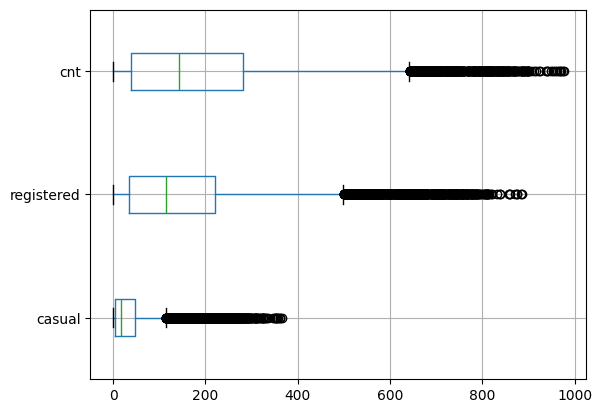

In [98]:
per_hour_df.boxplot(vert=False)
plt.show()

### Jumlah per hari

In [99]:
sum_agg = {
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
}

sum_per_date_df = df.resample(rule="D", on="datetime").agg(sum_agg)
sum_per_date_df.head()

,casual,registered,cnt
datetime,,,
2011-01-01,331,654,985
2011-01-02,131,670,801
2011-01-03,120,1229,1349
2011-01-04,108,1454,1562
2011-01-05,82,1518,1600


In [100]:
sum_per_date_df.describe()

,casual,registered,cnt
count,731.000000,731.000000,731.000000
mean,848.176471,3656.172367,4504.348837
std,686.622488,1560.256377,1937.211452
min,2.000000,20.000000,22.000000
25%,315.500000,2497.000000,3152.000000
50%,713.000000,3662.000000,4548.000000
75%,1096.000000,4776.500000,5956.000000
max,3410.000000,6946.000000,8714.000000


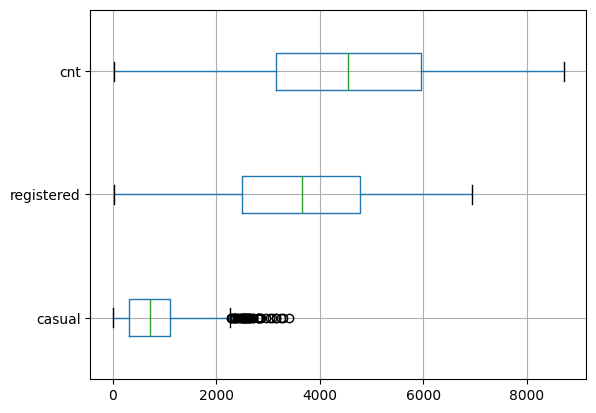

In [101]:
sum_per_date_df.boxplot(vert=False)
plt.show()

### Jumlah per bulan

In [102]:
sum_per_month_df = df.resample(rule="ME", on="datetime").agg(sum_agg)
sum_per_month_df.head()

,casual,registered,cnt
datetime,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821


In [103]:
sum_per_month_df.describe()

,casual,registered,cnt
count,24.000000,24.000000,24.000000
mean,25834.041667,111360.916667,137194.958333
std,13528.543135,40136.833621,52267.138331
min,3073.000000,35116.000000,38189.000000
25%,13140.250000,87474.500000,100811.250000
50%,27693.500000,106369.000000,136256.000000
75%,36953.000000,139733.500000,179634.250000
max,44235.000000,174795.000000,218573.000000


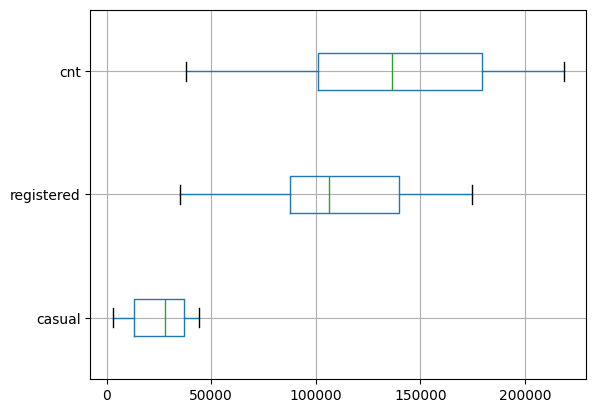

In [104]:
sum_per_month_df.boxplot(vert=False)
plt.show()

### Jumlah per tahun

In [105]:
sum_per_year_df = df.resample(rule="YE", on="datetime").agg(sum_agg)
sum_per_year_df.head()

,casual,registered,cnt
datetime,,,
2011-12-31,247252,995851,1243103
2012-12-31,372765,1676811,2049576


In [106]:
sum_per_year_df.describe()

,casual,registered,cnt
count,2.000000,2.000000e+00,2.000000e+00
mean,310008.500000,1.336331e+06,1.646340e+06
std,88751.093427,4.815114e+05,5.702625e+05
min,247252.000000,9.958510e+05,1.243103e+06
25%,278630.250000,1.166091e+06,1.444721e+06
50%,310008.500000,1.336331e+06,1.646340e+06
75%,341386.750000,1.506571e+06,1.847958e+06
max,372765.000000,1.676811e+06,2.049576e+06


### Insight
- Dari nilai diatas, dapat dilihat bahwa jumlah transaksi sangatlah volatile untuk per jam

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana petumbuhan transaksi pada tahun 2012 dibandingkan 2011?

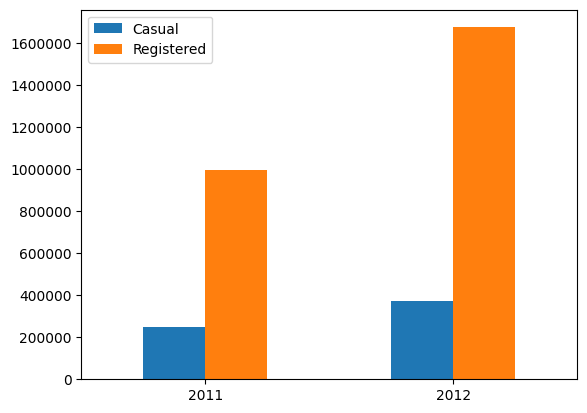

In [107]:
sum_per_year_df.index = pd.to_datetime(sum_per_year_df.index).strftime("%Y")

sum_per_year_df[["casual", "registered"]].plot.bar()
plt.ticklabel_format(axis="y", style="plain")
plt.legend(["Casual", "Registered"])
plt.xticks(rotation=0)
plt.xlabel(None)
plt.show()

Dari grafik diatas dapat dilihat bahwa terdapat pertumbuhan transaksi pada tahun 2012 dari tahun 2011.

### Pertanyaan 2: Bagaimana jumlah bulanan transaksi rental sepeda?

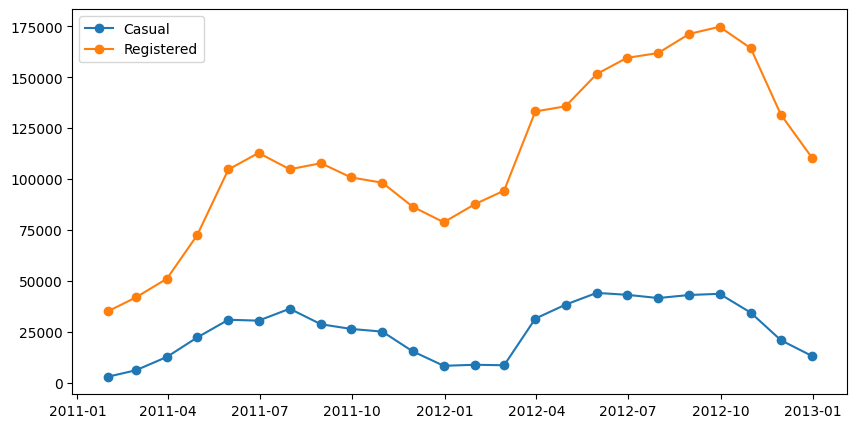

In [108]:
sum_per_month_df.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(
    sum_per_month_df["datetime"],
    sum_per_month_df["casual"],
    label="Casual",
    marker="o",
)
plt.plot(
    sum_per_month_df["datetime"],
    sum_per_month_df["registered"],
    label="Registered",
    marker="o",
)
plt.legend()
plt.show()

Dari grafik diatas dapat dilihat bahwa transaksi paling tinggi ada disekitar bulan Juli-Oktober
dengan penurunan transaksi di sekitar bulan Januari.

### Pertanyaan 3: Bulan apa transaksi paling sering terjadi?

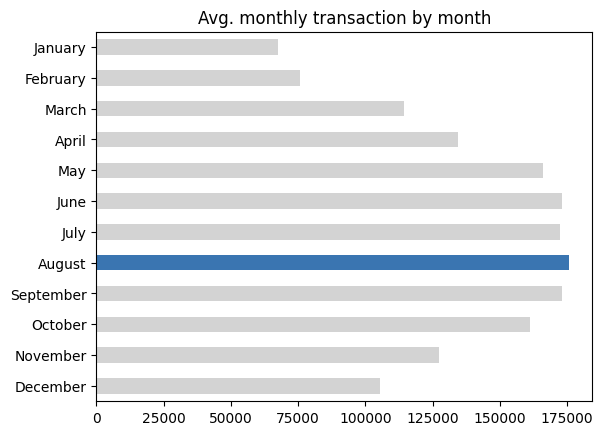

In [109]:
avg_by_month_df = sum_per_month_df.copy()
avg_by_month_df["month"] = avg_by_month_df["datetime"].dt.strftime("%B")

avg_by_month_df = avg_by_month_df.groupby("month").agg({"cnt": "mean"})
avg_by_month_df.sort_index(
    key=lambda x: pd.to_datetime(x, format="%B"),
    ascending=False,
    inplace=True,
)

max_val = avg_by_month_df["cnt"].max()
colors = avg_by_month_df["cnt"].apply(
    lambda x: "#3A75B1" if x == max_val else "#D3D3D3"
)

avg_by_month_df["cnt"].plot.barh(color=colors)
plt.title("Avg. monthly transaction by month")
plt.ylabel(None)
plt.show()

Dari grafik diatas dapat dilihat bahwa transaksi paling sering dilakukan pada bulan Agustus.

### Pertanyaan 4: Hari apa transaksi paling sering terjadi?

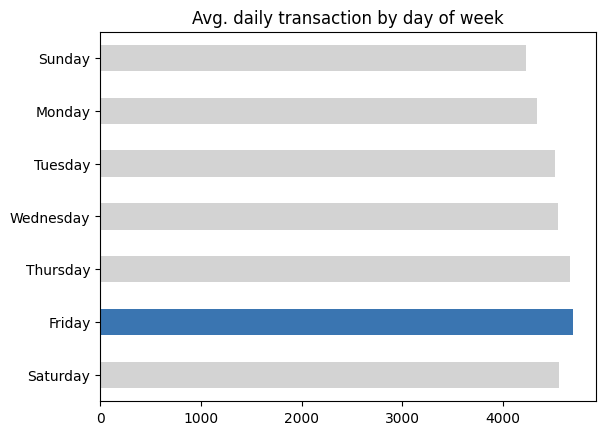

In [110]:
avg_by_day_df = sum_per_date_df.reset_index()
avg_by_day_df["day"] = pd.Categorical(avg_by_day_df["datetime"].dt.strftime("%A"), days)
avg_by_day_df = avg_by_day_df.groupby("day", observed=True).agg({"cnt": "mean"})
avg_by_day_df.sort_index(ascending=False, inplace=True)

max_val = avg_by_day_df["cnt"].max()
colors = avg_by_day_df["cnt"].apply(lambda x: "#3A75B1" if x == max_val else "#D3D3D3")

avg_by_day_df["cnt"].plot.barh(color=colors)
plt.title("Avg. daily transaction by day of week")
plt.ylabel(None)
plt.show()

Dari grafik diatas dapat dilihat bahwa transaksi paling sering dilakukan pada hari Jumat,    
namun perbedaan dari hari lain hanya seberapa.

### Pertanyaan 5: Jam berapa transaksi paling sering terjadi?

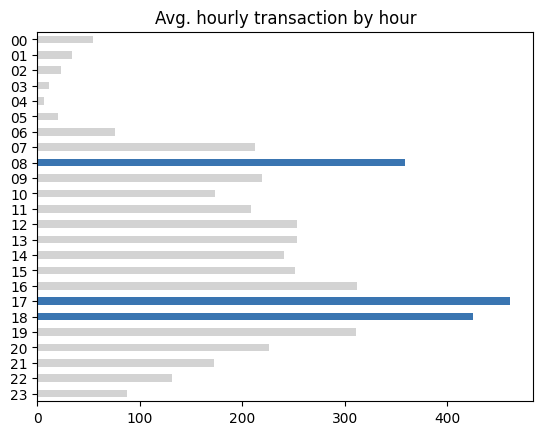

In [111]:
avg_by_hour_df = df.groupby(["hr"]).agg({"cnt": "mean"})
avg_by_hour_df.index = avg_by_hour_df.index.astype(str).str.pad(2, "left", "0")
avg_by_hour_df.sort_index(ascending=False, inplace=True)

max_val = avg_by_hour_df["cnt"].nlargest(3).values
colors = avg_by_hour_df["cnt"].apply(lambda x: "#3A75B1" if x in max_val else "#D3D3D3")

avg_by_hour_df["cnt"].plot.barh(color=colors)
plt.title("Avg. hourly transaction by hour")
plt.ylabel(None)
plt.show()

Dari grafik diatas dapat dilihat bahwa transaksi paling sering dilakukan pada pukul 17, diikuti dengan pukul 18 dan 08.    
Ini selaras dengan jam dimana orang-orang berangkat dan pulang melaksanakan aktifitas (sekolah, bekerja).

## Conclusion

- Jumlah transaksi rental sepeda mengalami penaikan pada tahun 2012 dibanding tahun 2011.
- Secara keseluruhan, jumlah transaksi per bulan mengalami penaikan, namun terjadi penurunan di sekitar bulan Januari.
- Transaksi paling sering terjadi di bulan Agustus.
- Transaksi paling sering terjadi di hari Jumat, namun hanya selisih kecil dari hari lainnya.
- Transaksi paling sering terjadi di pukul 17, 18, dan 08. Ini selaras dengan jam orang-orang berangkat dan pulang melaksanakan aktifitas (sekolah, bekerja).

In [112]:
sum_per_year_df.to_csv("dashboard/sum_per_year.csv")
sum_per_month_df.to_csv("dashboard/sum_per_month.csv", index=False)
avg_by_month_df.to_csv("dashboard/avg_by_month.csv")
avg_by_day_df.to_csv("dashboard/avg_by_day.csv")
avg_by_hour_df.to_csv("dashboard/avg_by_hour.csv")